In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
#pd.set_option('display.max_rows', None)
df=pd.read_csv('D:/GSU_SEM1_MSCS/Fundamentals of Cybersecurity/Project/CICIDS2017_sample.csv')
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,4,2,0,37,0,31,6,18.500000,17.677670,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,142377,46,62,1325,105855,570,0,28.804348,111.407285,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,118873,23,28,1169,45025,570,0,50.826087,156.137367,2896,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,143577,43,55,1301,107289,570,0,30.255814,115.178969,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,143745,49,59,1331,110185,570,0,27.163265,108.067176,4344,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,234,2,2,64,232,32,32,32.000000,0.000000,116,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56657,133288,2,2,94,482,47,47,47.000000,0.000000,241,...,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
56658,11507694,5,4,450,3525,450,0,90.000000,201.246118,3525,...,32,893.0,0.0,893,893,6503640.0,0.0,6503640,6503640,DoS
56659,11507707,8,6,416,11632,416,0,52.000000,147.078211,5792,...,32,897.0,0.0,897,897,6503122.0,0.0,6503122,6503122,DoS


In [ ]:
# df.info()

### Min-Max Normalization

In [80]:
numeric_features=df.dtypes[df.dtypes!='object'].index
df[numeric_features]=df[numeric_features].apply(lambda x: (x-x.min())/(x.max()-x.min()))
df=df.fillna(0)
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3.333333e-08,0.000144,0.000000,0.000013,0.000000,0.001327,0.003026,0.003114,0.002508,0.000000,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
1,1.186475e-03,0.006494,0.006277,0.000462,0.004923,0.024401,0.000000,0.004849,0.015804,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
2,9.906083e-04,0.003175,0.002835,0.000408,0.002094,0.024401,0.000000,0.008555,0.022149,0.248968,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
3,1.196475e-03,0.006061,0.005568,0.000454,0.004990,0.024401,0.000000,0.005093,0.016339,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
4,1.197875e-03,0.006927,0.005973,0.000464,0.005125,0.024401,0.000000,0.004572,0.015330,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,1.950000e-06,0.000144,0.000202,0.000022,0.000011,0.001370,0.016137,0.005386,0.000000,0.009972,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
56657,1.110733e-03,0.000144,0.000202,0.000033,0.000022,0.002012,0.023701,0.007911,0.000000,0.020719,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
56658,9.589745e-02,0.000577,0.000405,0.000157,0.000164,0.019264,0.000000,0.015149,0.028548,0.303043,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054652,0.0,0.054652,0.054652,DoS
56659,9.589756e-02,0.001010,0.000607,0.000145,0.000541,0.017808,0.000000,0.008753,0.020864,0.497937,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054648,0.0,0.054648,0.054648,DoS


Handling large values

In [ ]:
df = df.applymap(lambda x: np.nan if isinstance(x, (int, float)) and np.isinf(x) else x)

In [47]:
df=df.dropna()
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3.333333e-08,0.000144,0.000000,0.000013,0.000000,0.001327,0.003026,0.003114,0.002508,0.000000,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
1,1.186475e-03,0.006494,0.006277,0.000462,0.004923,0.024401,0.000000,0.004849,0.015804,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
2,9.906083e-04,0.003175,0.002835,0.000408,0.002094,0.024401,0.000000,0.008555,0.022149,0.248968,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
3,1.196475e-03,0.006061,0.005568,0.000454,0.004990,0.024401,0.000000,0.005093,0.016339,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
4,1.197875e-03,0.006927,0.005973,0.000464,0.005125,0.024401,0.000000,0.004572,0.015330,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,1.950000e-06,0.000144,0.000202,0.000022,0.000011,0.001370,0.016137,0.005386,0.000000,0.009972,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
56657,1.110733e-03,0.000144,0.000202,0.000033,0.000022,0.002012,0.023701,0.007911,0.000000,0.020719,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,BENIGN
56658,9.589745e-02,0.000577,0.000405,0.000157,0.000164,0.019264,0.000000,0.015149,0.028548,0.303043,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054652,0.0,0.054652,0.054652,DoS
56659,9.589756e-02,0.001010,0.000607,0.000145,0.000541,0.017808,0.000000,0.008753,0.020864,0.497937,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054648,0.0,0.054648,0.054648,DoS


Plotting the class distribution data 

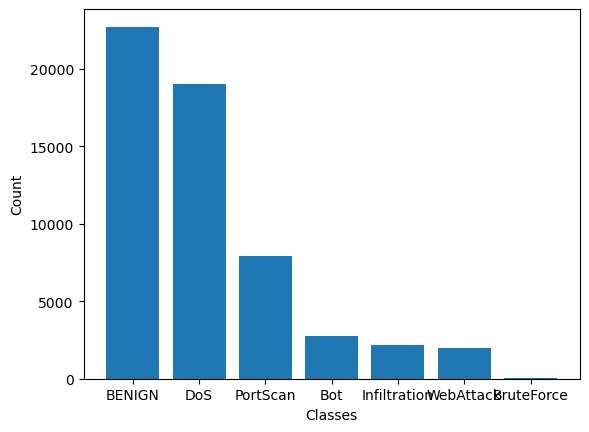

In [82]:
x=df['Label'].unique()
y=df['Label'].value_counts()
plt.bar(x, y, label='Classes')
plt.xlabel("Classes")
plt.ylabel("Count")
plt.show()



Label Encoder for the target class to handle categorical target class

In [83]:
df['Label']=LabelEncoder().fit_transform(df['Label'])
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3.333333e-08,0.000144,0.000000,0.000013,0.000000,0.001327,0.003026,0.003114,0.002508,0.000000,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
1,1.186475e-03,0.006494,0.006277,0.000462,0.004923,0.024401,0.000000,0.004849,0.015804,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
2,9.906083e-04,0.003175,0.002835,0.000408,0.002094,0.024401,0.000000,0.008555,0.022149,0.248968,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
3,1.196475e-03,0.006061,0.005568,0.000454,0.004990,0.024401,0.000000,0.005093,0.016339,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
4,1.197875e-03,0.006927,0.005973,0.000464,0.005125,0.024401,0.000000,0.004572,0.015330,0.373453,...,0.333333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56656,1.950000e-06,0.000144,0.000202,0.000022,0.000011,0.001370,0.016137,0.005386,0.000000,0.009972,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
56657,1.110733e-03,0.000144,0.000202,0.000033,0.000022,0.002012,0.023701,0.007911,0.000000,0.020719,...,0.533333,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0
56658,9.589745e-02,0.000577,0.000405,0.000157,0.000164,0.019264,0.000000,0.015149,0.028548,0.303043,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054652,0.0,0.054652,0.054652,3
56659,9.589756e-02,0.001010,0.000607,0.000145,0.000541,0.017808,0.000000,0.008753,0.020864,0.497937,...,0.533333,0.000009,0.0,0.000009,0.000009,0.054648,0.0,0.054648,0.054648,3


One-hot encoding the target class to handle the multiclass classification problem

In [84]:
from tensorflow.keras.utils import to_categorical
X=df.drop('Label',axis=1)
y=df['Label']
y_onehot=to_categorical(y)
X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.25, random_state=42, stratify=y)

# plt.bar(y_train, y_train.value_counts(), label='Classes')
# plt.xlabel("Classes")
# plt.ylabel("Count")
# plt.show()




In [85]:
X_val

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
33856,8.333017e-03,0.000144,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.333333,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
33922,2.835427e-02,0.000289,0.000304,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.533333,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
46534,7.021270e-01,0.000722,0.000506,1.133941e-04,5.393023e-04,0.013913,0.000000,0.009118,0.018821,0.746905,...,0.000167,0.533333,5.000000e-08,0.0,5.000000e-08,5.000000e-08,0.706723,0.0,0.706723,0.706723
11586,1.333333e-07,0.000000,0.000101,0.000000e+00,2.790698e-07,0.000000,0.000000,0.000000,0.000000,0.000516,...,0.000000,0.666667,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
47098,8.124741e-01,0.000722,0.000709,1.308394e-04,5.393023e-04,0.015283,0.000000,0.010520,0.020470,0.373453,...,0.000501,0.333333,1.702800e-04,0.0,1.702800e-04,1.702800e-04,0.819328,0.0,0.819328,0.819328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27101,4.083333e-07,0.000144,0.000000,1.395620e-06,0.000000e+00,0.000086,0.001009,0.000337,0.000000,0.000000,...,0.000167,0.400000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
26805,1.000000e-07,0.000000,0.000101,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.533333,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
10435,6.250000e-07,0.000000,0.000101,6.978099e-07,2.790698e-07,0.000086,0.001009,0.000337,0.000000,0.000516,...,0.000000,0.400000,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000
48677,8.364400e-01,0.000866,0.000607,1.126963e-04,5.393023e-04,0.013570,0.000000,0.007767,0.016946,0.497937,...,0.000334,0.333333,1.011000e-05,0.0,1.011000e-05,1.011000e-05,0.840336,0.0,0.840336,0.840336


In [24]:
# pip install threadpoolctl==3.1.0

In [86]:
y_onehot

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

SMOTE oversampling to handle the class imbalance in the data

In [87]:
smote=SMOTE(random_state=42)
X_train_resampled, y_train_resampled=smote.fit_resample(X_train, y_train)


# Model 1 # 128-64-32 dense layers, batch normalization with 0.3 dropout #ReLU Activation #Adam Optmimizer #use of class weights to handle imbalance

In [39]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
import numpy as np



###### Model Training
# Neural network using the Keras Sequential API. Here's a breakdown of the architecture:
# 
# Input Layer: 
# Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)): 
# The first dense layer has 256 units with ReLU activation. It expects input with the shape of (X_train_resampled.shape[1],).
# BatchNormalization(): This normalizes the activations of the previous layer, ensuring faster convergence and better performance.
# Dropout(0.3): A dropout rate of 30% is applied to reduce overfitting by randomly setting 30% of the units in the layer to zero during training.
#
# Hidden Layers:
# A dense layer with 64 and 32 units and ReLU activation function.
# BatchNormalization() and Dropout(0.3) follow the same process to stabilize training and prevent overfitting.
# 
# Output Layer:
# Dense(y_train_resampled.shape[1], activation='softmax'): The final output layer has the same number of units as the number of classes in y_train_resampled (i.e., the target variable).
# The softmax activation is used for multiclass classification, as it outputs probabilities for each class.



model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(y_train_resampled.shape[1],activation='softmax')
])



###### Model Compilation
# optimizer: This specifies the Adam optimizer with a learning rate of 0.001. 
# Adam is a widely used optimizer that combines the advantages of both AdaGrad and RMSProp, 
# adapting the learning rate for each parameter during training.
#
# Loss Function:This is the loss function used for multiclass classification. 
# It is appropriate when the target variable consists of one-hot encoded classes,
# as it calculates the cross-entropy loss between the true labels and the predicted probabilities for each class.
#
# Metrics: This indicates that the model should track the accuracy metric during training and evaluation, 
# which measures the percentage of correct predictions.
#
# This configuration is suitable for training a classification model where the target labels are one-hot encoded 
# and you're working with a multiclass problem. 
# The Adam optimizer will adjust the learning rate dynamically, 
# and the categorical cross-entropy loss will compute how well the model's predictions match the true labels.

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


###### Model Fitting
# Epochs=50: The number of times the entire training dataset is passed through the model during training. 
# After 50 epochs, the training process will stop unless early stopping criteria are met (explained below).
# 
# Batch Size=256: The number of samples per gradient update. 
# During each training step, the model processes 256 samples before updating the weights. 
# Larger batch sizes generally improve training speed but may affect generalization.
# 
# Class Weight=class weights are being used to handle imbalance, apart from SMOTE oversampling as part of preprocessing 
# 
# Callbacks: No Callbacks for learning rate adjustments


# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced', 
    classes=np.unique(np.argmax(y_train_resampled, axis=1)), 
    y=np.argmax(y_train_resampled, axis=1)
)
class_weight_dict = dict(enumerate(class_weights))

# Fit the Model
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=256,
    class_weight=class_weight_dict,  # Handle imbalance with class weights
    callbacks=[],  # No callbacks
    verbose=2
)

C:\Users\Pranjal\New folder\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
467/467 - 3s - 7ms/step - accuracy: 0.8359 - loss: 0.5264 - val_accuracy: 0.8861 - val_loss: 0.4338
Epoch 2/50
467/467 - 2s - 4ms/step - accuracy: 0.9369 - loss: 0.2168 - val_accuracy: 0.9198 - val_loss: 0.2999
Epoch 3/50
467/467 - 2s - 4ms/step - accuracy: 0.9481 - loss: 0.1786 - val_accuracy: 0.9233 - val_loss: 0.2625
Epoch 4/50
467/467 - 2s - 4ms/step - accuracy: 0.9527 - loss: 0.1606 - val_accuracy: 0.9258 - val_loss: 0.2367
Epoch 5/50
467/467 - 2s - 4ms/step - accuracy: 0.9562 - loss: 0.1466 - val_accuracy: 0.9293 - val_loss: 0.2118
Epoch 6/50
467/467 - 2s - 3ms/step - accuracy: 0.9594 - loss: 0.1391 - val_accuracy: 0.9324 - val_loss: 0.2124
Epoch 7/50
467/467 - 2s - 4ms/step - accuracy: 0.9626 - loss: 0.1300 - val_accuracy: 0.9330 - val_loss: 0.2089
Epoch 8/50
467/467 - 2s - 3ms/step - accuracy: 0.9642 - loss: 0.1239 - val_accuracy: 0.9319 - val_loss: 0.2090
Epoch 9/50
467/467 - 2s - 3ms/step - accuracy: 0.9659 - loss: 0.1181 - val_accuracy: 0.9373 - val_loss: 0.1840
E

In [92]:
class_weight_dict

{0: 1.0, 1: 1.0, 2: 1.0, 3: 1.0, 4: 1.0, 5: 1.0, 6: 1.0}

In [40]:
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_val shape: (14166, 77)
y_val shape: (14166, 7)


In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Model Evaluation
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

### Model Prediction
y_val_pred=model.predict(X_val)
y_val_pred_labels=np.argmax(y_val_pred, axis=1)
y_val_true_labels=np.argmax(y_val, axis=1)

### Classification and Confusion Report 



print("Classification Report:")
print(classification_report(y_val_true_labels,y_val_pred_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_val_true_labels, y_val_pred_labels))

443/443 - 1s - 1ms/step - accuracy: 0.9537 - loss: 0.1476
Validation Loss: 0.14762380719184875
Validation Accuracy: 0.9536919593811035
443/443 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.90      0.94      5683
           1       0.75      1.00      0.86       491
           2       0.83      0.99      0.90       692
           3       0.97      0.99      0.98      4759
           4       0.75      0.67      0.71         9
           5       0.95      1.00      0.97      1987
           6       0.92      0.94      0.93       545

    accuracy                           0.95     14166
   macro avg       0.88      0.93      0.90     14166
weighted avg       0.96      0.95      0.95     14166

Confusion Matrix:
[[5133  164  114  127    2   99   44]
 [   1  490    0    0    0    0    0]
 [   4    0  688    0    0    0    0]
 [  52    0    9 4696    0    0    2]
 [   3    0    0    0    6    0 

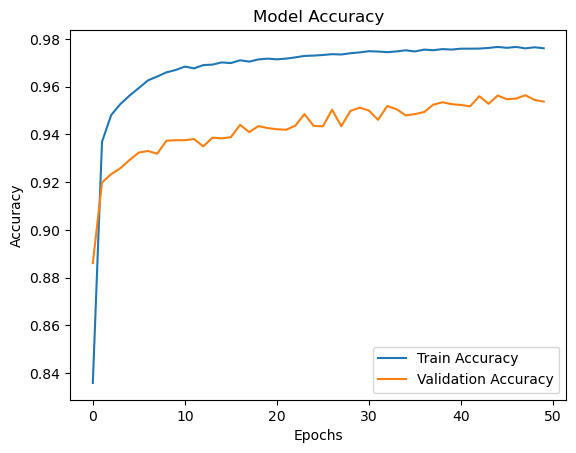

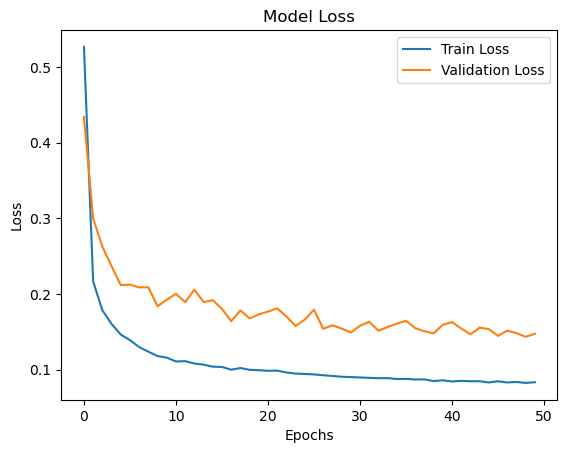

In [42]:
import matplotlib.pyplot as plt

### Plotting model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Plotting model loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model 2 # 256-128-64-32 dense layers, batch normalization with 0.3 dropout #LeakyReLU Activation #AdamW Optmimizer #use of SMOTE oversampling balanced data before training and oversample specific classes to handle imbalance

In [94]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.optimizers import AdamW
from collections import Counter
import numpy as np


###### Input standardization (Z-score)
#'X' is input features and 'y' is label, 
#performing feature scaling on the dataset X using standardization. 
# StandardScaler is a tool from scikit-learn that standardizes features by removing the mean and scaling them to unit variance.
# The formula applied is:  𝑧 = 𝑥 −𝜇/ 𝜎
# where:
# x: Original feature value.
# μ: Mean of the feature in the training data.
# σ: Standard deviation of the feature in the training data.
# After scaling, each feature will have:
# Mean: 0
# Standard Deviation: 1


# scaler=StandardScaler()
# X_scaled=scaler.fit_transform(X)

# ###### Split data
# y_onehot=to_categorical(y)
# X_train, X_val, y_train, y_val = train_test_split(X, y_onehot, test_size=0.2, stratify=y, random_state=42)

# print(f"X_train_resampled shape: {X_train.shape}")
# print(f"y_train_resampled shape: {y_train.shape}")

###### Handling Data Imbalance
#Given dataset has imbalance, to handle this we are using SMOTE oversampling 

smote = SMOTE(sampling_strategy={0: 17048 , 1: 17048 , 2: 17048 }, random_state=42)  # Example for specific classes
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)



######This callback dynamically reduces the learning rate when the model's performance on the validation set stops improving.
# Purpose : Prevents the model from getting stuck in local minima by reducing the learning rate gradually.
# Helps fine-tune the model towards convergence.
# When It's Triggered: If the validation loss (val_loss) does not improve for patience epochs, the learning rate is reduced by multiplying it with the factor.

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitors validation loss
    factor=0.5,          # Reduces learning rate by half
    patience=5,          # Waits for 5 epochs of no improvement before reducing LR
    min_lr=1e-6,         # Ensures the learning rate does not go below 1e-6
    verbose=1            # Prints a message when the learning rate is reduced
)


###### stops training a model early if it detects no improvement in a monitored metric (e.g., validation loss) for a specified number of epochs. 
# Prevent Overfitting: Stops training when the validation loss no longer improves, which could indicate overfitting.
# Save Time: Avoids wasting time on unnecessary epochs when the model has already converged.
# Efficient Training: Automatically determines the optimal number of epochs to train the model.

early_stopping = EarlyStopping(
    monitor='val_loss',          # Metric to monitor (validation loss in this case)
    patience=10,                 # Number of epochs to wait without improvement
    restore_best_weights=True,   # Restores the best weights from the epoch with the lowest val_loss
    verbose=1                    # Prints messages when early stopping is triggered
)


###### Model Training
# Neural network using the Keras Sequential API. Here's a breakdown of the architecture:
# 
# Input Layer: 
# Dense(256, activation='relu', input_shape=(X_train_resampled.shape[1],)): 
# The first dense layer has 256 units with ReLU activation. It expects input with the shape of (X_train_resampled.shape[1],).
# BatchNormalization(): This normalizes the activations of the previous layer, ensuring faster convergence and better performance.
# Dropout(0.3): A dropout rate of 30% is applied to reduce overfitting by randomly setting 30% of the units in the layer to zero during training.
#
# Hidden Layers:
# Dense(128, activation='relu'): A dense layer with 128, 64 and 32 units and ReLU activation function.
# BatchNormalization() and Dropout(0.4, 0.3 and 0.2) follow the same process to stabilize training and prevent overfitting.
# 
# Output Layer:
# Dense(y_train_resampled.shape[1], activation='softmax'): The final output layer has the same number of units as the number of classes in y_train_resampled (i.e., the target variable).
# The softmax activation is used for multiclass classification, as it outputs probabilities for each class.


model = Sequential([
    Dense(256, input_shape=(X_train_resampled.shape[1],)),
    LeakyReLU(alpha=0.1),  # LeakyReLU activation
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(128),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.4),
    
    Dense(64),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(32),
    LeakyReLU(alpha=0.1),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(y_train_resampled.shape[1], activation='softmax')
])


###### Model Compilation
# optimizer: This specifies the Adam optimizer with a learning rate of 0.001. 
# AdamW is a widely used optimizer that combines the advantages of both AdaGrad and RMSProp, 
# adapting the learning rate for each parameter during training along with weight decay=0.0001
#
# Loss Function:This is the loss function used for multiclass classification. 
# It is appropriate when the target variable consists of one-hot encoded classes,
# as it calculates the cross-entropy loss between the true labels and the predicted probabilities for each class.
#
# Metrics: This indicates that the model should track the accuracy metric during training and evaluation, 
# which measures the percentage of correct predictions.
#
# This configuration is suitable for training a classification model where the target labels are one-hot encoded 
# and you're working with a multiclass problem. 
# The Adam optimizer will adjust the learning rate dynamically, 
# and the categorical cross-entropy loss will compute how well the model's predictions match the true labels.


model.compile(
    optimizer=AdamW(learning_rate=0.001, weight_decay=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

###### Model Fitting
# Epochs=50: The number of times the entire training dataset is passed through the model during training. 
# After 50 epochs, the training process will stop unless early stopping criteria are met (explained below).
# 
# Batch Size=256: The number of samples per gradient update. 
# During each training step, the model processes 256 samples before updating the weights. 
# Larger batch sizes generally improve training speed but may affect generalization.
# 
# Class Weight=None: This argument is set to None, which means that class weights will not be adjusted as our dataset is already balanced. 
# 
# Callbacks:
# reduce_lr: This could be a learning rate reduction callback (e.g., ReduceLROnPlateau) that decreases the learning rate
# when the validation performance stops improving.
# early_stopping: This callback monitors a specified metric (e.g., validation loss) 
# and stops training if the metric stops improving for a set number of epochs, helping to prevent overfitting.

    
history=model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val,y_val),
    epochs=50,
    batch_size=256,
    class_weight=None,
    callbacks=[reduce_lr, early_stopping],
    verbose=2
)



C:\Users\Pranjal\New folder\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\Pranjal\New folder\lib\site-packages\keras\src\layers\activations\leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Epoch 1/50
286/286 - 12s - 41ms/step - accuracy: 0.8064 - loss: 0.6120 - val_accuracy: 0.7062 - val_loss: 0.9697 - learning_rate: 0.0010
Epoch 2/50
286/286 - 4s - 15ms/step - accuracy: 0.9208 - loss: 0.2747 - val_accuracy: 0.9056 - val_loss: 0.3013 - learning_rate: 0.0010
Epoch 3/50
286/286 - 4s - 14ms/step - accuracy: 0.9334 - loss: 0.2271 - val_accuracy: 0.9160 - val_loss: 0.2631 - learning_rate: 0.0010
Epoch 4/50
286/286 - 4s - 14ms/step - accuracy: 0.9395 - loss: 0.2064 - val_accuracy: 0.9210 - val_loss: 0.2500 - learning_rate: 0.0010
Epoch 5/50
286/286 - 5s - 16ms/step - accuracy: 0.9446 - loss: 0.1923 - val_accuracy: 0.9246 - val_loss: 0.2270 - learning_rate: 0.0010
Epoch 6/50
286/286 - 4s - 13ms/step - accuracy: 0.9472 - loss: 0.1864 - val_accuracy: 0.9253 - val_loss: 0.2357 - learning_rate: 0.0010
Epoch 7/50
286/286 - 4s - 14ms/step - accuracy: 0.9492 - loss: 0.1767 - val_accuracy: 0.9245 - val_loss: 0.2240 - learning_rate: 0.0010
Epoch 8/50
286/286 - 4s - 15ms/step - accuracy:

In [96]:
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_val shape: (14166, 77)
y_val shape: (14166, 7)


In [97]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Model Evaluation
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

### Model Prediction
y_val_pred=model.predict(X_val)
y_val_pred_labels=np.argmax(y_val_pred, axis=1)
y_val_true_labels=np.argmax(y_val, axis=1)

### Classification and Confusion Report 



print("Classification Report:")
print(classification_report(y_val_true_labels,y_val_pred_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_val_true_labels, y_val_pred_labels))

443/443 - 2s - 4ms/step - accuracy: 0.9461 - loss: 0.1571
Validation Loss: 0.1570775955915451
Validation Accuracy: 0.9461386203765869
443/443 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93      5683
           1       0.73      1.00      0.85       491
           2       0.76      0.99      0.86       692
           3       0.97      0.99      0.98      4759
           4       0.86      0.67      0.75         9
           5       0.95      1.00      0.97      1987
           6       0.97      0.91      0.94       545

    accuracy                           0.95     14166
   macro avg       0.89      0.92      0.90     14166
weighted avg       0.95      0.95      0.95     14166

Confusion Matrix:
[[5047  178  190  156    1   99   12]
 [   0  491    0    0    0    0    0]
 [   4    0  688    0    0    0    0]
 [  53    0   10 4695    0    0    1]
 [   3    0    0    0    6    0    

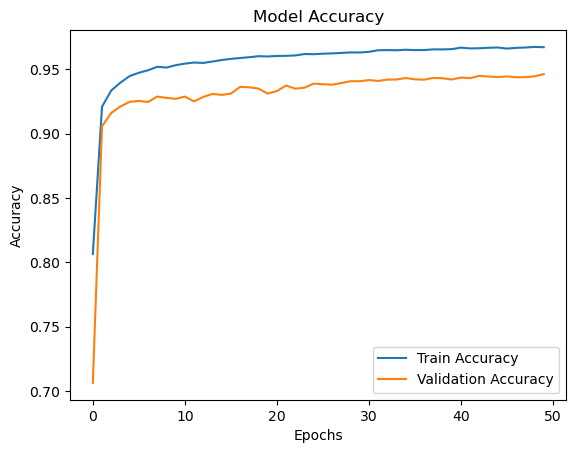

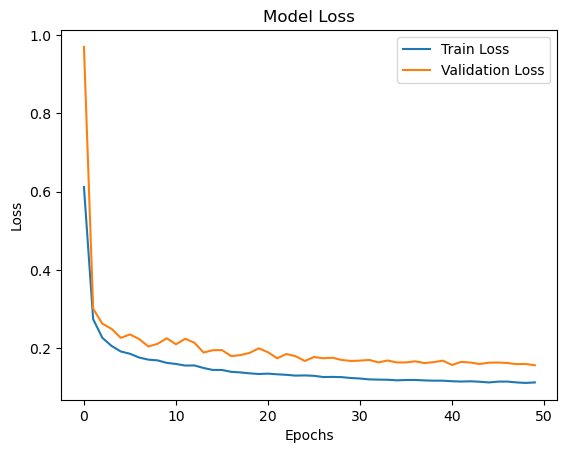

In [98]:
import matplotlib.pyplot as plt

### Plotting model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Plotting model loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model 3 #256-128-64 dense layers, batch normalization with 0.3 dropout #ReLU Activation #Adam Optmimizer #SMOTE oversampling -balanced data bedore training

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np


###### Input standardization (Z-score)
#'X' is input features and 'y' is label, 
#performing feature scaling on the dataset X using standardization. 
# StandardScaler is a tool from scikit-learn that standardizes features by removing the mean and scaling them to unit variance.
# The formula applied is:  𝑧 = 𝑥 −𝜇/ 𝜎
# where:
# x: Original feature value.
# μ: Mean of the feature in the training data.
# σ: Standard deviation of the feature in the training data.
# After scaling, each feature will have:
# Mean: 0
# Standard Deviation: 1


# scaler=StandardScaler()
# X_scaled=scaler.fit_transform(X)



###### Hanlding multiclass labels by converting them to onehot encoded format
# The provided code snippet performs one-hot encoding for the target variable y 
# and splits the dataset into training and validation sets. 
#Given data has 7 classes therefore each features will have 7 bit value


# y_onehot=to_categorical(y)
# X_train, X_val, y_train, y_val=train_test_split(X_scaled, y_onehot, test_size=0.15, random_state=42, stratify=y)



###### Handling Data Imbalance
#Given dataset has imbalance, to handle this we are using SMOTE oversampling 


# smote=SMOTE(sampling_strategy='auto', random_state=42)
# X_train_resampled, y_train_resampled=smote.fit_resample(X_train,y_train)


######This callback dynamically reduces the learning rate when the model's performance on the validation set stops improving.
# Purpose : Prevents the model from getting stuck in local minima by reducing the learning rate gradually.
# Helps fine-tune the model towards convergence.
# When It's Triggered: If the validation loss (val_loss) does not improve for patience epochs, the learning rate is reduced by multiplying it with the factor.

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Monitors validation loss
    factor=0.5,          # Reduces learning rate by half
    patience=5,          # Waits for 5 epochs of no improvement before reducing LR
    min_lr=1e-6,         # Ensures the learning rate does not go below 1e-6
    verbose=1            # Prints a message when the learning rate is reduced
)


###### stops training a model early if it detects no improvement in a monitored metric (e.g., validation loss) for a specified number of epochs. 
# Prevent Overfitting: Stops training when the validation loss no longer improves, which could indicate overfitting.
# Save Time: Avoids wasting time on unnecessary epochs when the model has already converged.
# Efficient Training: Automatically determines the optimal number of epochs to train the model.

early_stopping = EarlyStopping(
    monitor='val_loss',          # Metric to monitor (validation loss in this case)
    patience=10,                 # Number of epochs to wait without improvement
    restore_best_weights=True,   # Restores the best weights from the epoch with the lowest val_loss
    verbose=1                    # Prints messages when early stopping is triggered
)


###### Model Training
# Neural network using the Keras Sequential API. Here's a breakdown of the architecture:
# 
# Input Layer: 
# Dense(256, activation='relu', input_shape=(X_train_resampled.shape[1],)): 
# The first dense layer has 256 units with ReLU activation. It expects input with the shape of (X_train_resampled.shape[1],).
# BatchNormalization(): This normalizes the activations of the previous layer, ensuring faster convergence and better performance.
# Dropout(0.3): A dropout rate of 30% is applied to reduce overfitting by randomly setting 30% of the units in the layer to zero during training.
#
# Hidden Layers:
# Dense(128, activation='relu'): A dense layer with 128 units and ReLU activation function.
# BatchNormalization() and Dropout(0.3) follow the same process to stabilize training and prevent overfitting.
# Dense(64, activation='relu'): A dense layer with 64 units and ReLU activation.
# BatchNormalization() and Dropout(0.3) follow again.
# 
# Output Layer:
# Dense(y_train_resampled.shape[1], activation='softmax'): The final output layer has the same number of units as the number of classes in y_train_resampled (i.e., the target variable).
# The softmax activation is used for multiclass classification, as it outputs probabilities for each class.



model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    
    Dense(y_train_resampled.shape[1],activation='softmax')
])



###### Model Compilation
# optimizer: This specifies the Adam optimizer with a learning rate of 0.001. 
# Adam is a widely used optimizer that combines the advantages of both AdaGrad and RMSProp, 
# adapting the learning rate for each parameter during training.
#
# Loss Function:This is the loss function used for multiclass classification. 
# It is appropriate when the target variable consists of one-hot encoded classes,
# as it calculates the cross-entropy loss between the true labels and the predicted probabilities for each class.
#
# Metrics: This indicates that the model should track the accuracy metric during training and evaluation, 
# which measures the percentage of correct predictions.
#
# This configuration is suitable for training a classification model where the target labels are one-hot encoded 
# and you're working with a multiclass problem. 
# The Adam optimizer will adjust the learning rate dynamically, 
# and the categorical cross-entropy loss will compute how well the model's predictions match the true labels.

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

###### Model Fitting
# Epochs=50: The number of times the entire training dataset is passed through the model during training. 
# After 50 epochs, the training process will stop unless early stopping criteria are met (explained below).
# 
# Batch Size=256: The number of samples per gradient update. 
# During each training step, the model processes 256 samples before updating the weights. 
# Larger batch sizes generally improve training speed but may affect generalization.
# 
# Class Weight=None: This argument is set to None, which means that class weights will not be adjusted as our dataset is already balanced. 
# 
# Callbacks:
# reduce_lr: This could be a learning rate reduction callback (e.g., ReduceLROnPlateau) that decreases the learning rate
# when the validation performance stops improving.
# early_stopping: This callback monitors a specified metric (e.g., validation loss) 
# and stops training if the metric stops improving for a set number of epochs, helping to prevent overfitting.

    
history=model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_val,y_val),
    epochs=50,
    batch_size=256,
    class_weight=None,
    callbacks=[reduce_lr, early_stopping],
    verbose=2
)



Epoch 1/50


C:\Users\Pranjal\New folder\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


467/467 - 4s - 8ms/step - accuracy: 0.8947 - loss: 0.3398 - val_accuracy: 0.8467 - val_loss: 0.4500 - learning_rate: 0.0010
Epoch 2/50
467/467 - 2s - 5ms/step - accuracy: 0.9494 - loss: 0.1636 - val_accuracy: 0.9228 - val_loss: 0.2485 - learning_rate: 0.0010
Epoch 3/50
467/467 - 3s - 5ms/step - accuracy: 0.9558 - loss: 0.1424 - val_accuracy: 0.9255 - val_loss: 0.2413 - learning_rate: 0.0010
Epoch 4/50
467/467 - 2s - 4ms/step - accuracy: 0.9586 - loss: 0.1333 - val_accuracy: 0.9282 - val_loss: 0.2335 - learning_rate: 0.0010
Epoch 5/50
467/467 - 2s - 5ms/step - accuracy: 0.9625 - loss: 0.1237 - val_accuracy: 0.9295 - val_loss: 0.2117 - learning_rate: 0.0010
Epoch 6/50
467/467 - 2s - 5ms/step - accuracy: 0.9660 - loss: 0.1138 - val_accuracy: 0.9335 - val_loss: 0.2001 - learning_rate: 0.0010
Epoch 7/50
467/467 - 3s - 7ms/step - accuracy: 0.9678 - loss: 0.1088 - val_accuracy: 0.9341 - val_loss: 0.2028 - learning_rate: 0.0010
Epoch 8/50
467/467 - 3s - 6ms/step - accuracy: 0.9697 - loss: 0.10

In [28]:
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)

X_val shape: (14166, 77)
y_val shape: (14166, 7)


In [29]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Model Evaluation
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=2)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

### Model Prediction
y_val_pred=model.predict(X_val)
y_val_pred_labels=np.argmax(y_val_pred, axis=1)
y_val_true_labels=np.argmax(y_val, axis=1)

### Classification and Confusion Report 



print("Classification Report:")
print(classification_report(y_val_true_labels,y_val_pred_labels))

print("Confusion Matrix:")
print(confusion_matrix(y_val_true_labels, y_val_pred_labels))



443/443 - 1s - 1ms/step - accuracy: 0.9673 - loss: 0.0971
Validation Loss: 0.09710132330656052
Validation Accuracy: 0.9673160910606384
443/443 ━━━━━━━━━━━━━━━━━━━━ 1s 976us/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.93      0.96      5683
           1       0.82      1.00      0.90       491
           2       0.89      1.00      0.94       692
           3       0.98      1.00      0.99      4759
           4       0.75      0.67      0.71         9
           5       0.95      1.00      0.97      1987
           6       0.95      0.94      0.95       545

    accuracy                           0.97     14166
   macro avg       0.91      0.93      0.92     14166
weighted avg       0.97      0.97      0.97     14166

Confusion Matrix:
[[5284  107   57  111    2   98   24]
 [   1  490    0    0    0    0    0]
 [   2    0  690    0    0    0    0]
 [  17    0    5 4736    0    0    1]
 [   3    0    0    0    6    0 

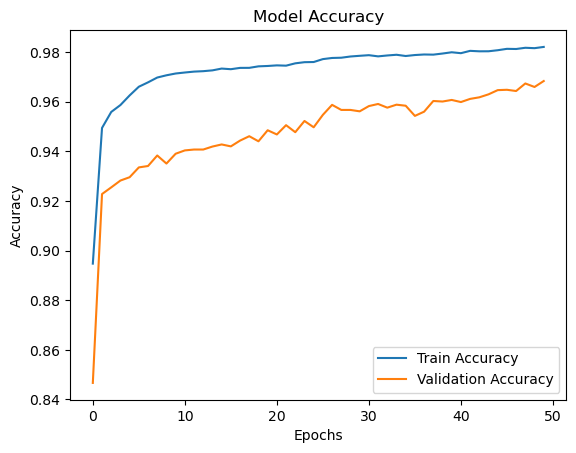

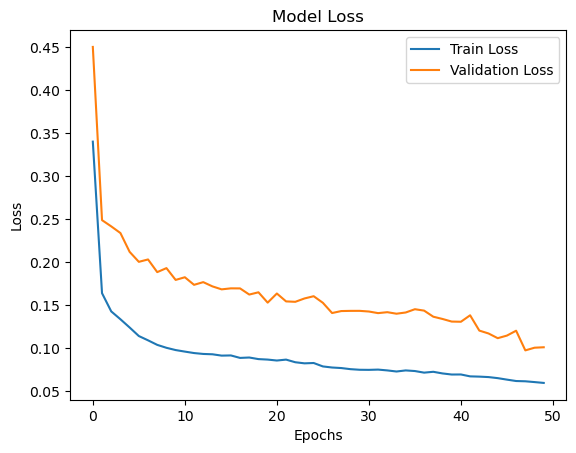

In [30]:
import matplotlib.pyplot as plt

### Plotting model accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Plotting model loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()